# ***HR Employee Attrition***

Group Members :-


1.   Somil Doshi
2.   Preet Desai
3.   Ayush Sanghavi





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("/content/HR_Employee_Attrition-1.csv")

In [ ]:
df.head(10)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,No,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,No,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,No,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,No,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,No,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(2940, 35)

In [ ]:
df.size

102900

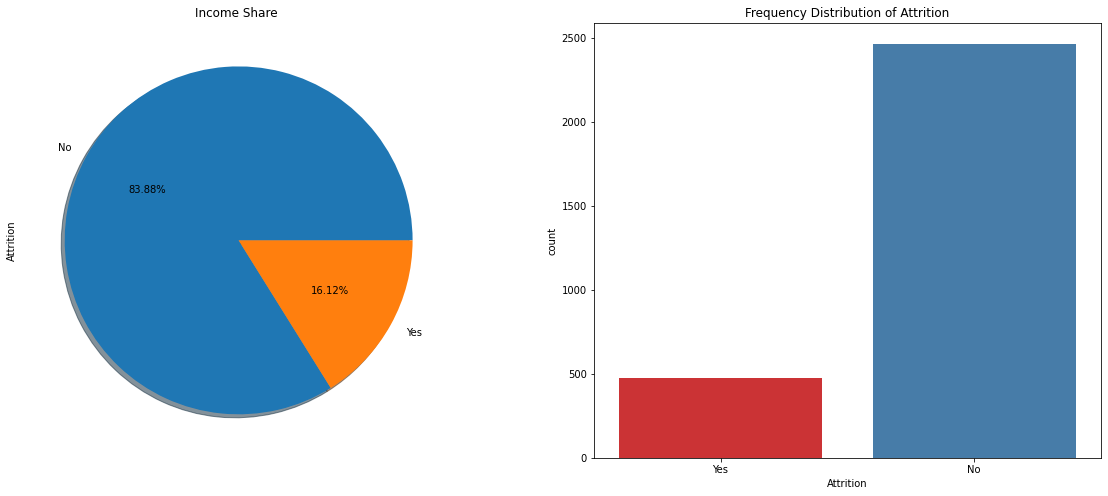

In [86]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0] = df['Attrition'].value_counts(). plot.pie(explode=[0,0], autopct = '%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Income Share ')

ax[1] = sns.countplot(x='Attrition', data=df, palette='Set1')
ax[1].set_title("Frequency Distribution of Attrition")
plt.show()

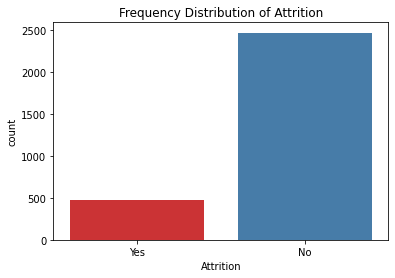

In [81]:
ax[1] = sns.countplot(x='Attrition', data=df, palette='Set1')
ax[1].set_title("Frequency Distribution of Attrition")
plt.show()

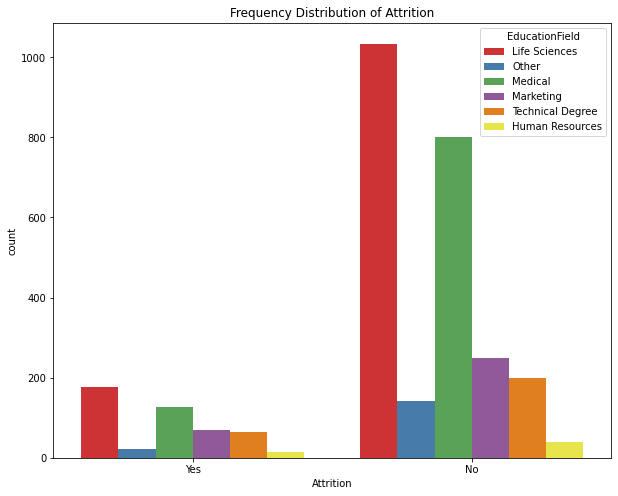

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='Attrition', hue= 'EducationField', data=df, palette='Set1' )
ax.set_title("Frequency Distribution of Attrition")
plt.show()

In [ ]:
x1=df.drop(["Attrition"],axis="columns",inplace=False)
y1=df["Attrition"]

In [ ]:
x1.drop(["EmployeeNumber","EmployeeCount","Over18"],axis=1,inplace=True)

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   BusinessTravel            2940 non-null   object
 2   DailyRate                 2940 non-null   int64 
 3   Department                2940 non-null   object
 4   DistanceFromHome          2940 non-null   int64 
 5   Education                 2940 non-null   int64 
 6   EducationField            2940 non-null   object
 7   EnvironmentSatisfaction   2940 non-null   int64 
 8   Gender                    2940 non-null   object
 9   HourlyRate                2940 non-null   int64 
 10  JobInvolvement            2940 non-null   int64 
 11  JobLevel                  2940 non-null   int64 
 12  JobRole                   2940 non-null   object
 13  JobSatisfaction           2940 non-null   int64 
 14  MaritalStatus           

In [ ]:
df["Gender"].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

In [ ]:
df.corr()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,1.000000,-0.005175,-0.025742,0.016464,0.020950,NaN,0.008712,0.017377,-0.003552,-0.009020,...,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
Age,-0.005175,1.000000,0.010661,-0.001686,0.208034,NaN,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.025742,0.010661,1.000000,-0.004985,-0.016806,NaN,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.016464,-0.001686,-0.004985,1.000000,0.021042,NaN,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.020950,0.208034,-0.016806,0.021042,1.000000,NaN,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.008712,0.010146,0.018355,-0.016075,-0.027128,NaN,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.017377,0.024287,0.023381,0.031131,0.016775,NaN,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.003552,0.029820,0.046135,0.008783,0.042438,NaN,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.009020,0.509604,0.002966,0.005303,0.101589,NaN,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


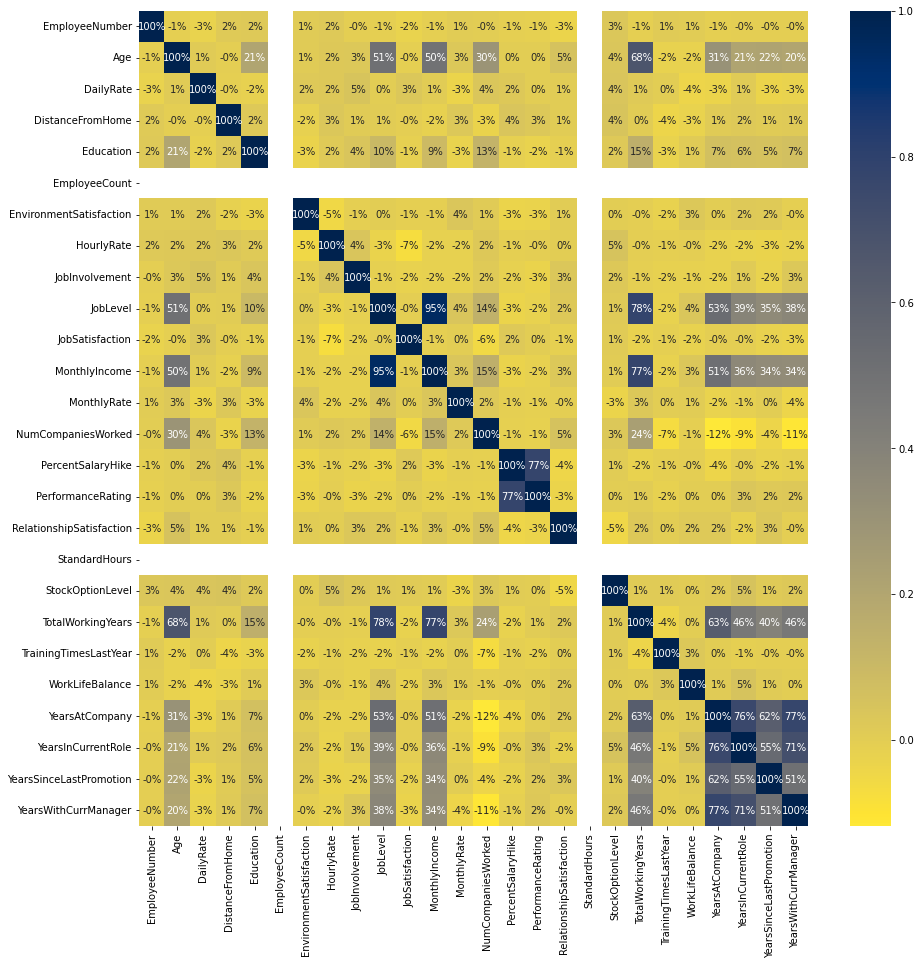

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='cividis_r',fmt='.0%')

In [ ]:
def initial_eda(dataset):
  if isinstance(dataset, pd.DataFrame):
    total_na = dataset.isna().sum().sum()
    print("Total Records", dataset.shape)
    print("Total NA Records", total_na)
    cols = dataset.columns
    dtype = dataset.dtypes
    duniq = dataset.nunique()
    na_val = dataset.isna().sum()
    print("Cols dataset", "Datatype", "unique_records", "null records")
    for i in range(len(dataset.columns)):
      print("%38s %10s %10s %10s"% (cols[i], dtype[i], duniq[i], na_val[i]))
  else:
    print('error in the code ')

In [ ]:
initial_eda(df)

Total Records (2940, 35)
Total NA Records 0
Cols dataset Datatype unique_records null records
                        EmployeeNumber      int64       2940          0
                             Attrition     object          2          0
                                   Age      int64         43          0
                        BusinessTravel     object          3          0
                             DailyRate      int64        886          0
                            Department     object          3          0
                      DistanceFromHome      int64         29          0
                             Education      int64          5          0
                        EducationField     object          6          0
                         EmployeeCount      int64          1          0
               EnvironmentSatisfaction      int64          4          0
                                Gender     object          2          0
                            HourlyRate    

In [ ]:
pip install category-encoders

     |████████████████████████████████| 86 kB 2.8 MB/s 


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['BusinessTravel', 'Department','EducationField','Gender','JobRole', 'MaritalStatus', 'OverTime'])
x1= encoder.fit_transform(x1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x1.head(20)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,2,1,2,1,94,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,2,8,1,1,3,2,61,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,2,2,4,2,92,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,2,3,4,1,4,1,56,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,2,2,1,3,1,2,40,...,4,80,1,6,3,3,2,2,2,2
5,32,2,1005,2,2,2,1,4,2,79,...,3,80,0,8,2,2,7,7,3,6
6,59,1,1324,2,3,3,3,3,1,81,...,1,80,3,12,3,2,1,0,0,0
7,30,1,1358,2,24,1,1,4,2,67,...,2,80,1,1,2,3,1,0,0,0
8,38,2,216,2,23,3,1,4,2,44,...,2,80,0,10,2,3,9,7,1,8
9,36,1,1299,2,27,3,3,3,2,94,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   BusinessTravel            2940 non-null   int64
 2   DailyRate                 2940 non-null   int64
 3   Department                2940 non-null   int64
 4   DistanceFromHome          2940 non-null   int64
 5   Education                 2940 non-null   int64
 6   EducationField            2940 non-null   int64
 7   EnvironmentSatisfaction   2940 non-null   int64
 8   Gender                    2940 non-null   int64
 9   HourlyRate                2940 non-null   int64
 10  JobInvolvement            2940 non-null   int64
 11  JobLevel                  2940 non-null   int64
 12  JobRole                   2940 non-null   int64
 13  JobSatisfaction           2940 non-null   int64
 14  MaritalStatus             2940 non-null 

In [ ]:
cols=x1.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x1= scaler.fit_transform(x1)
x1=pd.DataFrame(x1,columns=[cols])

In [ ]:
x1.head(20)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.384615,0.0,0.433526,-1.0,-0.500000,-0.5,-1.0,-0.5,-1.0,0.777778,...,-1.0,0.0,-1.0,-0.222222,-3.0,-2.0,0.166667,0.2,-0.333333,0.4
1,1.000000,1.0,-0.755780,0.0,0.083333,-1.0,-1.0,0.0,0.0,-0.138889,...,0.5,0.0,0.0,0.000000,0.0,0.0,0.833333,0.8,0.000000,0.8
2,0.076923,0.0,0.825145,0.0,-0.416667,-0.5,-0.5,0.5,0.0,0.722222,...,-0.5,0.0,-1.0,-0.333333,0.0,0.0,-0.833333,-0.6,-0.333333,-0.6
3,-0.230769,1.0,0.852601,0.0,-0.333333,0.5,-1.0,0.5,-1.0,-0.277778,...,0.0,0.0,-1.0,-0.222222,0.0,0.0,0.500000,0.8,0.666667,-0.6
4,-0.692308,0.0,-0.304913,0.0,-0.416667,-1.0,0.0,-1.0,0.0,-0.722222,...,0.5,0.0,0.0,-0.444444,0.0,0.0,-0.500000,-0.2,0.333333,-0.2
5,-0.307692,1.0,0.293353,0.0,-0.416667,-0.5,-1.0,0.5,0.0,0.361111,...,0.0,0.0,-1.0,-0.222222,-1.0,-1.0,0.333333,0.8,0.666667,0.6
6,1.769231,0.0,0.754335,0.0,-0.333333,0.0,0.0,0.0,-1.0,0.416667,...,-1.0,0.0,2.0,0.222222,0.0,-1.0,-0.666667,-0.6,-0.333333,-0.6
7,-0.461538,0.0,0.803468,0.0,1.416667,-1.0,-1.0,0.5,0.0,0.027778,...,-0.5,0.0,0.0,-1.000000,-1.0,0.0,-0.666667,-0.6,-0.333333,-0.6
8,0.153846,1.0,-0.846821,0.0,1.333333,0.0,-1.0,0.5,0.0,-0.611111,...,-0.5,0.0,-1.0,0.000000,-1.0,0.0,0.666667,0.8,0.000000,1.0
9,0.000000,0.0,0.718208,0.0,1.666667,0.0,0.0,0.0,0.0,0.777778,...,-0.5,0.0,1.0,0.777778,0.0,-1.0,0.333333,0.8,2.000000,0.8


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [ ]:
print(x_train.shape," ",x_test.shape," ")

(2058, 31)   (882, 31)  


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)
y_pred1= rfc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred1

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred1)
print('randomforest classifier', np.abs(score)*100)

randomforest classifier 95.46485260770974


# **Random Forest Accuracy = 95.46 %**